In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from omegaconf import OmegaConf
import pandas as pd
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple

In [37]:
slack = 5
single_col_width = 89 - slack
double_col_width = 183 - slack
height = 89 - slack


def mm_to_inch(mm):
    return mm / 25.4

In [38]:
# reference: nature final artwork requirement
# https://www.nature.com/nature/for-authors/final-submission#:~:text=Final%20print%2Donly%20artwork
plt_conf = OmegaConf.load("nature.yaml")
print(plt_conf)

{'axes.labelsize': 7, 'xtick.labelsize': 7, 'ytick.labelsize': 7, 'legend.fontsize': 7, 'font.size': 7, 'font.family': 'sans-serif', 'font.sans-serif': 'Arial, Helvetica', 'mathtext.fontset': 'dejavusans', 'axes.linewidth': 0.5, 'grid.linewidth': 0.5, 'lines.linewidth': 1.0, 'lines.markersize': 3, 'pdf.fonttype': 42, 'ps.fonttype': 42, 'svg.fonttype': 'none'}


In [39]:
for key, value in plt_conf.items():
    plt.rcParams[key] = value

In [40]:
# Load the numpy archives
labels = np.load("raw_data/2b_cci/nyutron_temporal_labels.npy")
preds = np.load("raw_data/2b_cci/nyutron_temporal_preds.npy")
classes = ["0", "1-2", "3-4", ">=5"]

/var/folders/5v/561pm5gx1h9fgr_77mp6091m0000gn/T/ipykernel_16568/1271958095.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('AIP_plots/2b_right.eps', box_inches='tight', format='eps', transparent=True)
/var/folders/5v/561pm5gx1h9fgr_77mp6091m0000gn/T/ipykernel_16568/1271958095.py:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('AIP_plots/2b_right.svg', box_inches='tight', format='svg', transparent=True)
/var/folders/5v/561pm5gx1h9fgr_77mp6091m0000gn/T/ipykernel_16568/1271958095.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('AIP_plots/2b_right.pdf', box_inches='tight', format='pdf', transparent=True)


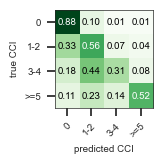

In [41]:
# Draw the most basic confusion matrix
# plt.subplots(figsize=(mm_to_inch(single_col_width), mm_to_inch(height)))
cm = confusion_matrix(labels, preds)
cm = cm / cm.sum(1, keepdims=True)

plt.rcParams.update(plt_conf)
plt.rcParams["figure.figsize"] = (
    mm_to_inch(double_col_width / 3),
    mm_to_inch(height / 2),
)
figure, ax = plot_confusion_matrix(
    conf_mat=cm,
    class_names=classes,
    show_absolute=False,
    show_normed=True,
    colorbar=False,
    cmap="Greens",
)

plt.xlabel("predicted CCI")
plt.ylabel("true CCI")
plt.tight_layout()
plt.savefig(
    "AIP_plots/2b_right.eps", box_inches="tight", format="eps", transparent=True
)
plt.savefig(
    "AIP_plots/2b_right.svg", box_inches="tight", format="svg", transparent=True
)
plt.savefig(
    "AIP_plots/2b_right.pdf", box_inches="tight", format="pdf", transparent=True
)

In [42]:
clinical_df = pd.read_csv("raw_data/2c_ops.csv", index_col=0)
clinical_df

,Number of Train Samples,Temporal (OVR) AUC,run_seed,task,data
9,41842,0.868065,13,Insurance denial,Clinical Note + NYUTron
27,334515,0.786223,36,LOS,Clinical Note + NYUTron
26,334515,0.788539,42,LOS,Clinical Note + NYUTron
25,334515,0.790449,24,LOS,Clinical Note + NYUTron
28,334515,0.786389,13,LOS,Clinical Note + NYUTron
8,41842,0.870147,0,Insurance denial,Clinical Note + NYUTron
7,41842,0.872335,24,Insurance denial,Clinical Note + NYUTron
29,334515,0.786916,0,LOS,Clinical Note + NYUTron
5,41842,0.873986,42,Insurance denial,Clinical Note + NYUTron
6,41842,0.873417,36,Insurance denial,Clinical Note + NYUTron


In [43]:
palette = sns.color_palette("Set2", 10)
palette

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

/var/folders/5v/561pm5gx1h9fgr_77mp6091m0000gn/T/ipykernel_16568/1482153865.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(data=clinical_df, x='task',y=temporal_metric_name,hue='data',estimator=np.median, ci='sd',
/var/folders/5v/561pm5gx1h9fgr_77mp6091m0000gn/T/ipykernel_16568/1482153865.py:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('AIP_plots/2b_left.eps', box_inches='tight', format='eps', transparent=True)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/var/folders/5v/561pm5gx1h9fgr_77mp6091m0000gn/T/ipykernel_16568/1482153865.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('AIP_plots/2b_left.pdf', 

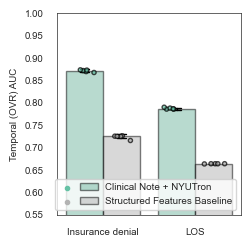

In [45]:
plt.cla()
temporal_metric_name = "Temporal (OVR) AUC"
sns.set(font_scale=2, style="white")
np.random.seed(53)
# plt.figure(figsize=(8,8))
plt.rcParams.update(plt_conf)
plt.rcParams["figure.figsize"] = (
    mm_to_inch(double_col_width * 0.36),
    mm_to_inch(height * 0.75),
)
ax = sns.barplot(
    data=clinical_df,
    x="task",
    y=temporal_metric_name,
    hue="data",
    estimator=np.median,
    ci="sd",
    palette=[palette[0], palette[7]],
    edgecolor="black",
    errcolor="black",
    capsize=0.1,
    errwidth=1,
    alpha=0.5,
)
sns.stripplot(
    x="task",
    y=temporal_metric_name,
    hue="data",
    data=clinical_df,
    dodge=True,
    alpha=0.7,
    palette=[palette[0], palette[7]],
    ax=ax,
    s=3,
    jitter=0.3,
    linewidth=1,
    edgecolor="black",
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=[(handles[idx], handles[idx + 2]) for idx in range(2)],
    labels=labels[:2],
    loc="lower right",
    handlelength=4,
    handler_map={tuple: HandlerTuple(ndivide=None)},
)
plt.ylim([0.55, 1])
plt.xlabel("")
plt.tight_layout()
plt.savefig("AIP_plots/2b_left.eps", box_inches="tight", format="eps", transparent=True)
plt.savefig("AIP_plots/2b_left.pdf", box_inches="tight", format="pdf", transparent=True)
plt.savefig("AIP_plots/2b_left.svg", box_inches="tight", format="svg")